# Exploratory Data Analysis


### Import data

In [1]:
import pandas as pd

df = pd.read_csv('train_ship_segmentations_v2.csv')
df.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


## How many ships are there in an image?

If an image has multiple ships, there will be multiple entries for that image in the segmentations data. Each entry will have the same `ImageId` but different `EncodedPixels`.

We can count the number of times an `ImageId` repeats to know how many ships it contains.

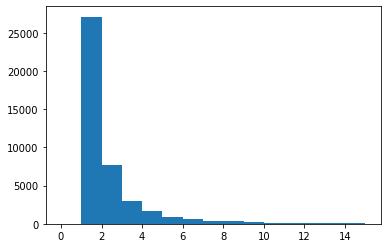

In [44]:
import matplotlib.pyplot as plt

# Rows with 'EncodedPixels' == NaN have 0 ships
df.loc[df['EncodedPixels'].isna() == True]

counts = df.loc[df['EncodedPixels'].isna() == False]['ImageId'].value_counts().values

plt.hist(counts, range(max(counts)+1))
plt.show()

In [42]:
count_map = {}
for i in range(1, max(counts)+1):
    count_map[i] = list(counts).count(i)
print(count_map)

{1: 27104, 2: 7674, 3: 2954, 4: 1622, 5: 925, 6: 657, 7: 406, 8: 318, 9: 243, 10: 168, 11: 144, 12: 124, 13: 75, 14: 76, 15: 66}
